<a href="https://colab.research.google.com/github/preetamjumech/Text_classification_ML/blob/main/Text_Classification_BoW_N_Grams_AverageWord2Vec___Preetam_Saha_17_12_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
temp_df = pd.read_csv('IMDB Dataset.csv')
temp_df.shape

(50000, 2)

In [3]:
df = temp_df[:10000]

In [4]:
df.sample()

,review,sentiment
8835,I tend to love everything the great late Paul ...,negative


In [5]:
df.iloc[1]

review       A wonderful little production. <br /><br />The...
sentiment                                             positive
Name: 1, dtype: object

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(inplace=True)

<ipython-input-7-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


<Axes: >

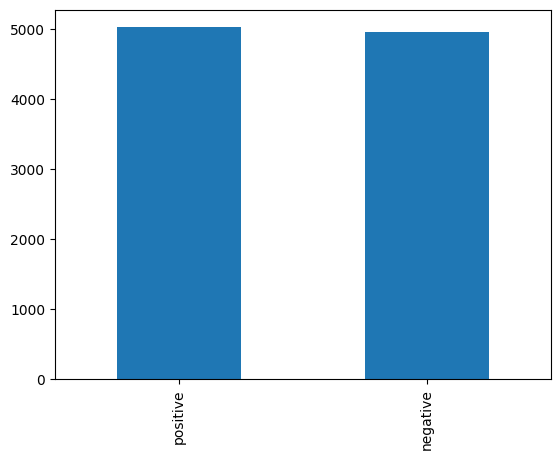

In [8]:
df["sentiment"].value_counts().plot(kind="bar")

In [9]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
#Removing html tags
import re
def remove_tags(txt):
  clean = re.sub(re.compile('<.*?>'),"",txt)
  return clean

In [11]:
df["review"] = df["review"].apply(remove_tags)
df.iloc[1]

<ipython-input-11-e08f52c7eace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(remove_tags)


review       A wonderful little production. The filming tec...
sentiment                                             positive
Name: 1, dtype: object

In [12]:
df["review"] = df["review"].apply(lambda x: x.lower())
df.iloc[1]

<ipython-input-12-60b4faae7f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply(lambda x: x.lower())


review       a wonderful little production. the filming tec...
sentiment                                             positive
Name: 1, dtype: object

In [13]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [14]:
from nltk.corpus import stopwords
sw_lst = stopwords.words("english")
df["review"] = df["review"].apply( lambda x: [i for i in x.split() if i not in sw_lst]) .apply(lambda x: " ".join(x))
df.iloc[1]

<ipython-input-14-7015f0ca1364>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review"] = df["review"].apply( lambda x: [i for i in x.split() if i not in sw_lst]) .apply(lambda x: " ".join(x))


review       wonderful little production. filming technique...
sentiment                                             positive
Name: 1, dtype: object

In [15]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = lbl.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X_train.shape

(7986, 1)

In [19]:
X_train.iloc[0]

review    i've waiting superhero movie like long time. "...
Name: 6713, dtype: object

# BoW - CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cnt = CountVectorizer()
X_train_cnt = cnt.fit_transform(X_train["review"]).toarray()

In [21]:
X_train_cnt.shape

(7986, 48282)

In [22]:
X_train_cnt[0]

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
X_test_cnt = cnt.transform(X_test["review"]).toarray()

In [28]:
X_test_cnt.shape

(1997, 48282)

# GaussianNB

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_cnt,y_train)

GaussianNB()

In [29]:
y_pred = gnb.predict(X_test_cnt)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6324486730095142

In [30]:
confusion_matrix(y_test,y_pred)

array([[717, 235],
       [499, 546]])

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)

rf.fit(X_train_cnt,y_train)
y_pred = rf.predict(X_test_cnt)
accuracy_score(y_test,y_pred)

0.8617926890335503

# max_features

In [32]:
cnt = CountVectorizer(max_features=3000)

X_train_cnt = cnt.fit_transform(X_train['review']).toarray()
X_test_cnt = cnt.transform(X_test['review']).toarray()

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train_cnt,y_train)
y_pred = rf.predict(X_test_cnt)
accuracy_score(y_test,y_pred)

0.8487731597396094

# n_gram - bi-gram

In [34]:
cnt = CountVectorizer(ngram_range= (1,2), max_features = 3000)

X_train_cnt = cnt.fit_transform(X_train["review"]).toarray()
X_test_cnt = cnt.transform(X_test["review"]).toarray()

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train_cnt,y_train)
y_pred = rf.predict(X_test_cnt)
accuracy_score(y_test,y_pred)

0.8477716574862293

In [35]:
cnt = CountVectorizer(ngram_range= (1,2), max_features = 8000)

X_train_cnt = cnt.fit_transform(X_train["review"]).toarray()
X_test_cnt = cnt.transform(X_test["review"]).toarray()

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train_cnt,y_train)
y_pred = rf.predict(X_test_cnt)
accuracy_score(y_test,y_pred)

0.8532799198798198

#n_gram - tri-gram

In [36]:
cnt = CountVectorizer(ngram_range= (1,3), max_features = 8000)

X_train_cnt = cnt.fit_transform(X_train["review"]).toarray()
X_test_cnt = cnt.transform(X_test["review"]).toarray()

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train_cnt,y_train)
y_pred = rf.predict(X_test_cnt)
accuracy_score(y_test,y_pred)

0.8522784176264396

# TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

X_train_tf = tf.fit_transform(X_train["review"]).toarray()
X_test_tf = tf.transform(X_test["review"]).toarray()

rf = RandomForestClassifier(n_estimators = 1000)

rf.fit(X_train_tf,y_train)
y_pred = rf.predict(X_test_tf)

accuracy_score(y_test,y_pred)

0.8612919379068603

# Word2Vec

In [38]:
import gensim

In [39]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [47]:
df["review"][0]

"one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid. show pulls punches regards drugs, sex violence. hardcore, classic use word.it called oz nickname given oswald maximum security state penitentary. focuses mainly emerald city, experimental section prison cells glass fronts face inwards, privacy high agenda. em city home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.i would say main appeal show due fact goes shows dare. forget pretty pictures painted mainstream audiences, forget charm, forget romance...oz mess around. first episode ever saw struck nasty surreal, say ready it, watched more, developed taste oz, got accustomed high levels graphic violence. violence, injustice (crooked guards who'll sold nickel, inmates who'll kill order g

In [48]:
story = []
for i in df["review"]:
  raw = sent_tokenize(i)
  for j in raw:
    story.append(simple_preprocess(j))

In [53]:
len(story)

105773

In [49]:
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 2
)

In [50]:
model.build_vocab(story)

In [52]:
model.epochs

5

In [51]:
model.corpus_count

105773

In [54]:
model.train(story, total_examples= model.corpus_count, epochs = model.epochs )

(5876376, 6212140)

In [56]:
len(model.wv.index_to_key)

31845

In [57]:
(model.wv.index_to_key)[:10]

['movie', 'film', 'one', 'like', 'good', 'it', 'the', 'would', 'time', 'even']

In [72]:
def avg_w2v(txt):
  x = [word for word in txt.split() if word in model.wv.index_to_key]
  print(x)
  print(len(x))
  print(model.wv[x])
  print(model.wv[x].shape)
  return np.mean(model.wv[x], axis = 0)

In [73]:
avg_w2v(df['review'][0])

['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'exactly', 'happened', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'set', 'right', 'word', 'trust', 'show', 'faint', 'hearted', 'show', 'pulls', 'punches', 'regards', 'sex', 'classic', 'use', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'focuses', 'mainly', 'emerald', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'privacy', 'high', 'em', 'city', 'home', 'irish', 'death', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'forget', 'pretty', 'pictures', 'painted', 'mainstream', 'forget', 'forget', 'mess', 'first', 'episode', 'ever', 'saw', 'struck', 'nasty', 'say', 'ready', 'watched', 'developed', 'taste', 'got', 'accustomed', 'high', 'levels', 'graphic', 'injustice', 'guards', 'sold', 'inmates', 'kill', 'order', 'get', 'away', 'well', 'middle', 'class', '

array([-1.98522583e-01,  5.25319040e-01,  1.86681509e-01,  2.47284815e-01,
       -7.41565898e-02, -6.23423755e-01,  1.73934191e-01,  9.65156972e-01,
       -4.28661793e-01, -2.92069048e-01, -3.67207140e-01, -4.29802030e-01,
        4.77191284e-02,  1.63949102e-01,  2.24433884e-01, -2.02279717e-01,
        8.77687708e-03, -3.33109766e-01, -6.82379901e-02, -6.08679414e-01,
        1.38909314e-02,  2.88880646e-01,  1.30701393e-01, -2.64733046e-01,
       -3.51981997e-01, -3.52487504e-03, -3.14027876e-01,  1.10802138e-02,
       -3.55562001e-01,  8.10509473e-02,  3.61298859e-01, -1.66979898e-03,
        1.46567807e-01, -2.95832813e-01, -1.51795760e-01,  4.56140548e-01,
        7.69517273e-02, -3.47600967e-01, -2.30004683e-01, -6.95306242e-01,
        1.77703097e-01, -2.12142512e-01,  3.83530818e-02, -4.97946292e-02,
        5.09702146e-01, -1.84692219e-01, -1.99469775e-01, -5.05745586e-04,
        9.35981274e-02,  3.03859591e-01,  3.30342092e-02, -3.66531312e-01,
       -4.09381390e-01, -

In [74]:
avg_w2v(df['review'][1])

['wonderful', 'little', 'filming', 'technique', 'fashion', 'gives', 'sometimes', 'sense', 'realism', 'entire', 'actors', 'extremely', 'well', 'michael', 'sheen', 'got', 'voices', 'pat', 'truly', 'see', 'seamless', 'editing', 'guided', 'references', 'diary', 'well', 'worth', 'watching', 'terrificly', 'written', 'performed', 'masterful', 'production', 'one', 'great', 'comedy', 'realism', 'really', 'comes', 'home', 'little', 'fantasy', 'guard', 'rather', 'use', 'traditional', 'techniques', 'remains', 'solid', 'plays', 'knowledge', 'particularly', 'scenes', 'concerning', 'orton', 'halliwell', 'sets', 'flat', 'decorating', 'every', 'terribly', 'well']
62
[[ 0.03886174  0.14958645  0.2134768  ... -0.35672945 -0.21654475
   0.07245697]
 [-0.2830121   0.74486697 -0.48218483 ... -0.3138511   0.08405204
  -0.29274458]
 [-0.09767415  0.66588193  0.174513   ... -0.10661712 -0.1983517
   0.14889523]
 ...
 [ 0.3252976   2.080534    0.27120912 ...  0.31499168  0.4959253
  -1.4223765 ]
 [-0.06153648  

array([-0.09144305,  0.43072575,  0.09658712, -0.10865118, -0.04733777,
       -0.4702335 , -0.083499  ,  0.68522775, -0.2934998 , -0.24918643,
       -0.48527867, -0.39469028, -0.13857539,  0.24891432,  0.25751325,
       -0.09319912,  0.14724767, -0.46400848, -0.10126542, -0.8345959 ,
        0.2033439 ,  0.2476466 ,  0.2179511 ,  0.01059017, -0.01528604,
        0.3197443 , -0.16601892, -0.26896247, -0.39945456,  0.06443421,
        0.6405784 ,  0.11203278,  0.20019998, -0.383418  , -0.14403333,
        0.49924925,  0.06963219, -0.2637523 , -0.43688682, -0.78588927,
        0.26382858, -0.56553423, -0.2370626 ,  0.16306669,  0.47858912,
       -0.2930339 , -0.36868286, -0.04733688,  0.09016732,  0.27825937,
        0.19486779, -0.43521723, -0.39823204,  0.03230788, -0.35424247,
        0.07415486,  0.10304911, -0.23951855, -0.61774457, -0.01666393,
       -0.0951151 ,  0.06894047, -0.23405384,  0.22951935, -0.4255108 ,
        0.49671057,  0.00670616,  0.14925957, -0.3185828 ,  0.39

In [79]:
from tqdm import tqdm

In [ ]:
lst = []
for doc in tqdm(df["review"]):
  lst.append(avg_w2v(doc))
lst = np.array(lst)
print(lst.shape)
print(lst[0])

In [82]:
print(lst.shape)
print(lst[0])

(9983, 100)
[-1.98522583e-01  5.25319040e-01  1.86681509e-01  2.47284815e-01
 -7.41565898e-02 -6.23423755e-01  1.73934191e-01  9.65156972e-01
 -4.28661793e-01 -2.92069048e-01 -3.67207140e-01 -4.29802030e-01
  4.77191284e-02  1.63949102e-01  2.24433884e-01 -2.02279717e-01
  8.77687708e-03 -3.33109766e-01 -6.82379901e-02 -6.08679414e-01
  1.38909314e-02  2.88880646e-01  1.30701393e-01 -2.64733046e-01
 -3.51981997e-01 -3.52487504e-03 -3.14027876e-01  1.10802138e-02
 -3.55562001e-01  8.10509473e-02  3.61298859e-01 -1.66979898e-03
  1.46567807e-01 -2.95832813e-01 -1.51795760e-01  4.56140548e-01
  7.69517273e-02 -3.47600967e-01 -2.30004683e-01 -6.95306242e-01
  1.77703097e-01 -2.12142512e-01  3.83530818e-02 -4.97946292e-02
  5.09702146e-01 -1.84692219e-01 -1.99469775e-01 -5.05745586e-04
  9.35981274e-02  3.03859591e-01  3.30342092e-02 -3.66531312e-01
 -4.09381390e-01 -1.14909574e-01 -1.23473950e-01  1.60232723e-01
  2.00719938e-01  1.45318329e-01 -2.32473284e-01  4.47330959e-02
  8.68346021e

In [83]:
X = lst

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [89]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7736604907361042